Engineer: Adeola Odunewu
Intern: FlipRobo LLC DS1123
Project: Avocado_Project Classification and Regression Analysis

In [1]:
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.svm import SVC
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*deprecated.*")


In [2]:
# Updated URL with the .zip extension
url = 'https://github.com/FlipRoboTechnologies/ML_-Datasets/raw/main/Avocado/avocado.csv.zip'

# Read the CSV file directly from the URL
df = pd.read_csv(url)

# Display the first few rows of the DataFrame
df.head()


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Display descriptive statistics for the AveragePrice column
df['AveragePrice'].describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

Approximately 68% of the values fall within the interval [mean - 0.44, mean + 0.44]. 
It suggests the values are normally distributed and fall within one standard deviation (the spread of the value) of the mean.

<Axes: xlabel='AveragePrice', ylabel='Density'>

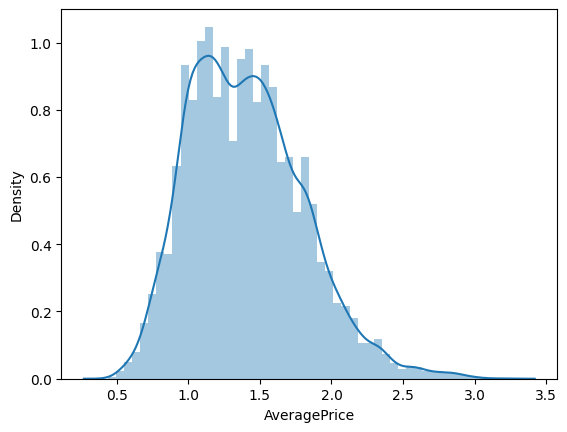

In [4]:
# Plot a distribution plot (histogram and kernel density estimation) for the 'AveragePrice' column
sns.distplot(df['AveragePrice'])

In [10]:
# Calculate the skewness of the AveragePrice column
df['AveragePrice'].skew()

0.5803027378878419

A value of 0.5803 indicates that the distribution of values in the AveragePrice 
the column is moderately skewed to the right.

This suggests that there are more occurrences of lower prices, with a few 
higher-priced outliers.

In [27]:
# Checking for missing data
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [36]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

The DataFrame df consists of 2 integer columns, 9 float columns, and 3 categorical 
columns.

In [49]:
# Create DataFrame for bivariate analysis: AveragePrice with Type
averageprice_with_type = df[['AveragePrice', 'type']]

# Create DataFrame for bivariate analysis: AveragePrice with Region
averageprice_with_region = df[['AveragePrice', 'region']]


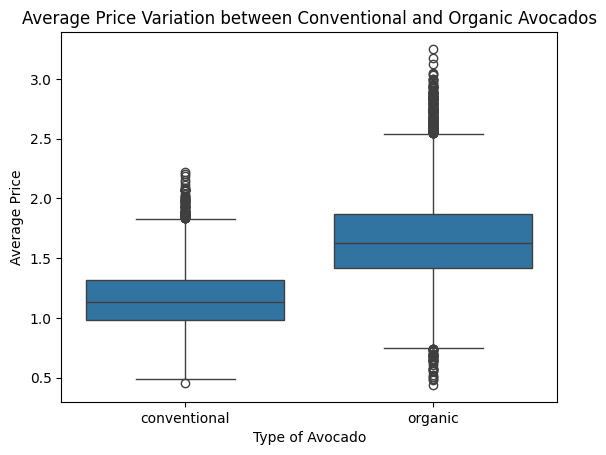

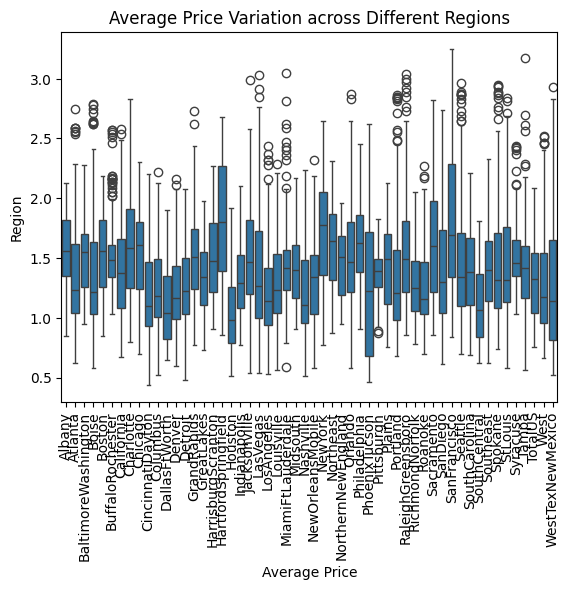

In [44]:
# Exploring how the average price varies between conventional and organic avocados.
sns.boxplot(data=averageprice_with_type, x='type', y='AveragePrice')
plt.title('Average Price Variation between Conventional and Organic Avocados')
plt.xlabel('Type of Avocado')
plt.ylabel('Average Price')
plt.show()

# Exploring how the average price varies within different regions.
sns.boxplot(data=averageprice_with_region, x='region', y='AveragePrice')
plt.title('Average Price Variation across Different Regions') # Set title and axis labels
plt.xlabel('Average Price')
plt.ylabel('Region')
plt.xticks(rotation=90)# Rotate x-axis labels for better readability
plt.show()


Average Price and Avocado Types Insight:
Organic avocados exhibit a notably higher median average price in comparison to 
conventional avocados. This observation shows the potential influence of 
avocado type on pricing strategies and consumer preferences. It suggests that organic 
avocados might be perceived as a premium product by consumers, leading to a higher 
average price point for this category.

Average Price and Region Insight:
The fact that Hartford-Springfield, New York, and San Francisco have the highest median average prices for avocados is quite insightful. 
The observation suggests substantial regional differences in avocado prices, implying 
that regions with higher incomes or a stronger demand for organic produce tend to 
command higher avocado prices. Such regional price discrepancies offer valuable
insights into market dynamics and consumer preferences.

In [52]:
# Select relevant variables for bivariate analysis and calculate descriptive statistics
rela_check = df[['region','type']]
rela_check.describe()

,region,type
count,18249,18249
unique,54,2
top,Albany,conventional
freq,338,9126


In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model using Ordinary Least Squares (OLS)
model = ols('AveragePrice ~ C(region) + C(type) + C(region):C(type)', data=df).fit()

# Perform ANOVA using Type II sum of squares
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)


                        sum_sq       df             F         PR(>F)
C(region)           497.256738     53.0    139.328541   0.000000e+00
C(type)            1121.987963      1.0  16661.860020   0.000000e+00
C(region):C(type)   117.835096     53.0     33.016731  2.386829e-315
Residual           1221.591324  18141.0           NaN            NaN


The p-values associated with region and type(product) factors are considerably smaller than the commonly used significance level (0.05), indicating significant effects on the AveragePrie. This suggests that the region where the produce is sold and the type of produce significantly influence the average price.

Additionally, the large F-statistics provide strong evidence against the null hypothesis of no effect, further supporting the significance of these factors. The presence of NaN values in the ANOVA tab , imiesng evidence against the null hypoesisl."

In [54]:
# Generate descriptive statistics of DataFrame
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [12]:
# Get the number of columns in the DataFrame
len(df.columns)

14

In [3]:
# Identify numeric features
numeric_data = []

# Iterate over both column names and their corresponding data types
for i, dtype in zip(df.columns, df.dtypes):
    if dtype == 'int64' or dtype == 'float64':  # Check if the data type is numeric
        numeric_data.append(i)  # Add the column name to the list of numeric features

# Identify categorical features
cate_data = []

# Iterate over both column names and their corresponding data types
for j, dtype in zip(df.columns, df.dtypes):
    if dtype == 'object':  # Check if the data type is categorical
        cate_data.append(j)  # Add the column name to the list of categorical features


In [5]:
numeric_data

['Unnamed: 0',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

In [6]:
cate_data

['Date', 'type', 'region']

In [5]:
# Select only the numerical columns
numeric_dataR = df.select_dtypes(include=['int64', 'float64'])

# Calculate skewness for each numerical column
skewness = numeric_dataR.skew()
skewness

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags: These columns exhibit highly right-skewed distributions, 
with skewness values ranging from approximately 8.65 to 13.14. Such high positive skewness values suggest that the majority of data points are 
concentrated at lower values, while there are a few extremely high values that extend the right tail of the distribution  David S. Moore et al (1993). This indicates that there might be significant variations in the volumes or bags of avocados sold, with a few instances of exceptionally large transactions skewing the overall distribution.

AveragePrice: The skewness value of around 0.580 indicates a moderately right-skewed distribution. This suggests that while most avocado prices might be clustered around lower values, there could be a few higher-priced avocados that contribute to the right tail of the distribution.

In [8]:
# Select only the categorical columns
cate_dataR = df.select_dtypes(include=['object'])
print(cate_dataR.drop('Date', axis = 1))


               type            region
0      conventional            Albany
1      conventional            Albany
2      conventional            Albany
3      conventional            Albany
4      conventional            Albany
...             ...               ...
18244       organic  WestTexNewMexico
18245       organic  WestTexNewMexico
18246       organic  WestTexNewMexico
18247       organic  WestTexNewMexico
18248       organic  WestTexNewMexico

[18249 rows x 2 columns]


In [6]:
# Drop columns with names containing Unnamed or any other characters
numeric_dataR = numeric_dataR.drop('Unnamed: 0', axis = 1)


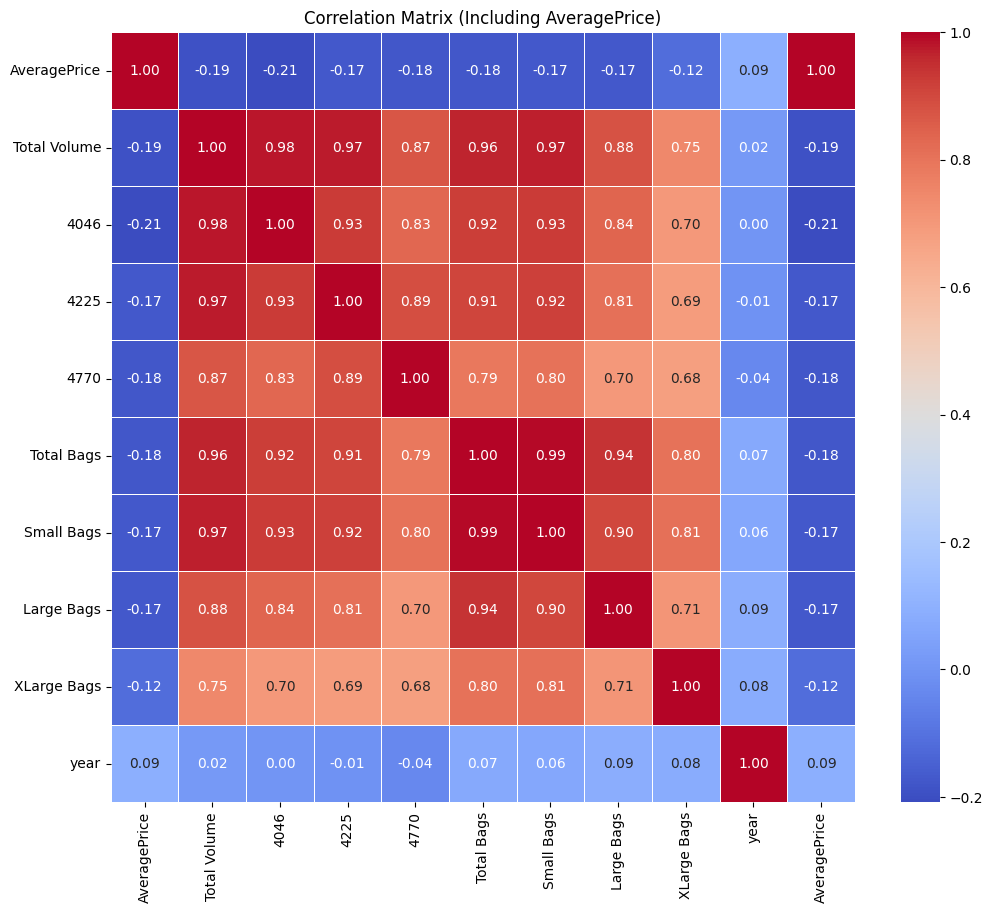

In [6]:
# Correlation Analysis for X is the DataFrame

correlation_matrix = numeric_dataR.corr()

# Calculate correlation coefficients between all predictor variables and the target variable, while 'W' denote Win
correlation_with_ap = numeric_dataR.corrwith(numeric_dataR['AveragePrice'])

# Concatenate the correlation coefficients with the original correlation matrix
correlation_matrix_with_ap = pd.concat([correlation_matrix, correlation_with_ap], axis=1)
correlation_matrix_with_ap.columns = list(correlation_matrix.columns) + ['AveragePrice']

# Plot the correlation matrix including the target variable
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_with_ap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Including AveragePrice)")
plt.show()

In [39]:
correlation_matrix

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


Moderate Negative Correlation with Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags:
This implies that there is a relationship between the volume of avocados sold and their average price. When there is a higher supply 
of avocados (that is the higher volumes and more bags sold), the average price tends to be lower, suggesting that prices may decrease when
there is an abundance of avocados in the market.
The weak positive correlation with the year indicates that, over time, there is a slight tendency for the average price of avocados to increase.

In [17]:
import statsmodels.api as sm

# Define the independent variable(s) (X) and the dependent variable (y)
X = numeric_dataR.drop('AveragePrice', axis=1)  # Include all independent variables except 'AveragePrice'
y = numeric_dataR['AveragePrice']  # Select the 'AveragePrice' column as the dependent variable

# Add a constant term to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           AveragePrice   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     128.8
Date:                Sat, 20 Apr 2024   Prob (F-statistic):          2.79e-236
Time:                        20:18:42   Log-Likelihood:                -8731.7
No. Observations:               18249   AIC:                         1.748e+04
Df Residuals:                   18239   BIC:                         1.756e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -78.5534      6.348    -12.375   

Interpretation: Based on the p-values and coefficients, I find that Unnamed: 0 (is not significant to this study), Total Volume, 4046, 4225, 4770, and year 
exhibit statistically significant relationships with AveragePrice. Conversely, 'Total Bags', 'Small Bags', 'Large Bags', and 'XLarge Bags' 
do not demonstrate significant associations with AveragePrice at the conventional significance level. Consequently, it may be appropriate to 
consider dropping variables that lack significant relationships with the target variable.

Model Fit: The overall model fit is evaluated using the F-statistic, which tests the overall significance of the regression model. The F-statistic 
is 142.5 with a very small p-value Prob F-statistic: 1.04e-288, indicating that the model as a whole is statistically significant.

In [7]:
# Handling Outliers
q1 = numeric_dataR.quantile(0.25)
q3 = numeric_dataR.quantile(0.75)
iqr = q3-q1
outlier_conditions = (( numeric_dataR < (q1 - 1.5 * iqr)) | (numeric_dataR > (q3 + 1.5 * iqr)))

# Display rows containing outliers
outliers = df[outlier_conditions.any(axis=1)]
print("Rows with outliers:")
print(outliers)

Rows with outliers:
       Unnamed: 0        Date  AveragePrice  Total Volume       4046  \
52              0  2015-12-27          0.99     386100.49  292097.36   
54              2  2015-12-13          0.96     417772.47  324932.28   
55              3  2015-12-06          1.07     357636.82  283024.01   
60              8  2015-11-01          0.99     419088.74  290457.50   
66             14  2015-09-20          0.93     516432.60  346118.51   
...           ...         ...           ...           ...        ...   
18228           3  2018-03-04          1.46     347373.17   25990.60   
18229           4  2018-02-25          1.49     301985.61   34200.18   
18231           6  2018-02-11          1.47     275248.53   24732.55   
18232           7  2018-02-04          1.41     283378.47   22474.66   
18236          11  2018-01-07          1.48     297190.60   34734.97   

           4225     4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
52     27350.92   297.90    66354.31  

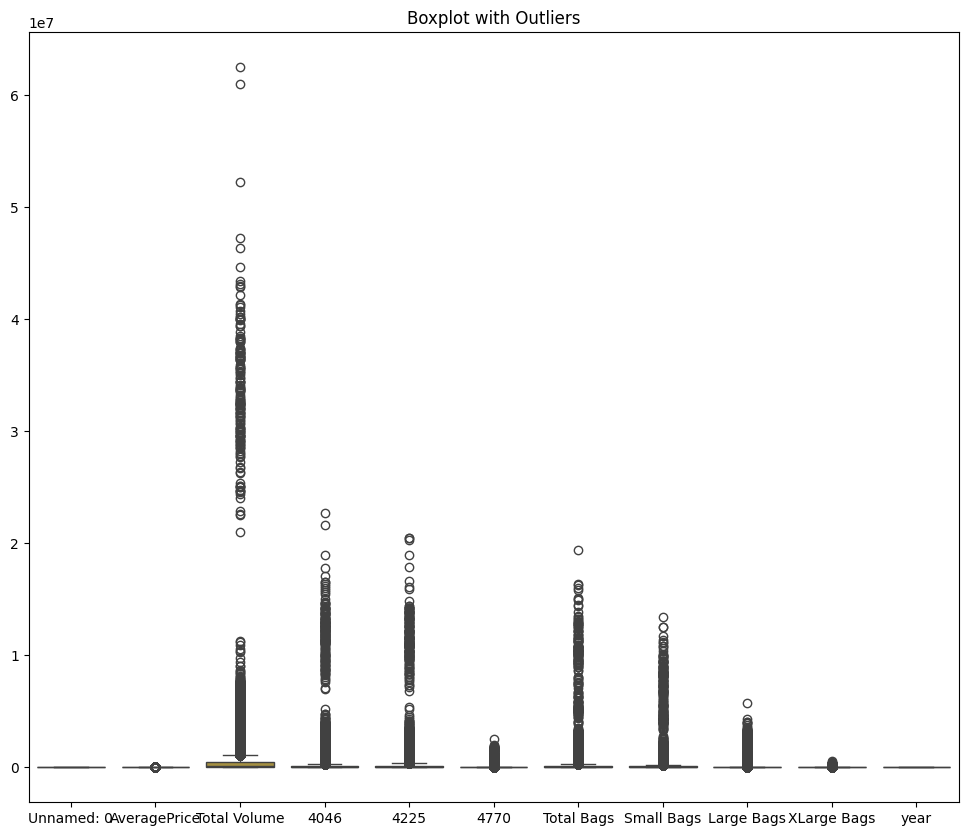

In [47]:
# Visualize the outliers using a boxplot
plt.figure(figsize=(12, 10))  
sns.boxplot(data = numeric_dataR)
plt.title("Boxplot with Outliers")
plt.show()

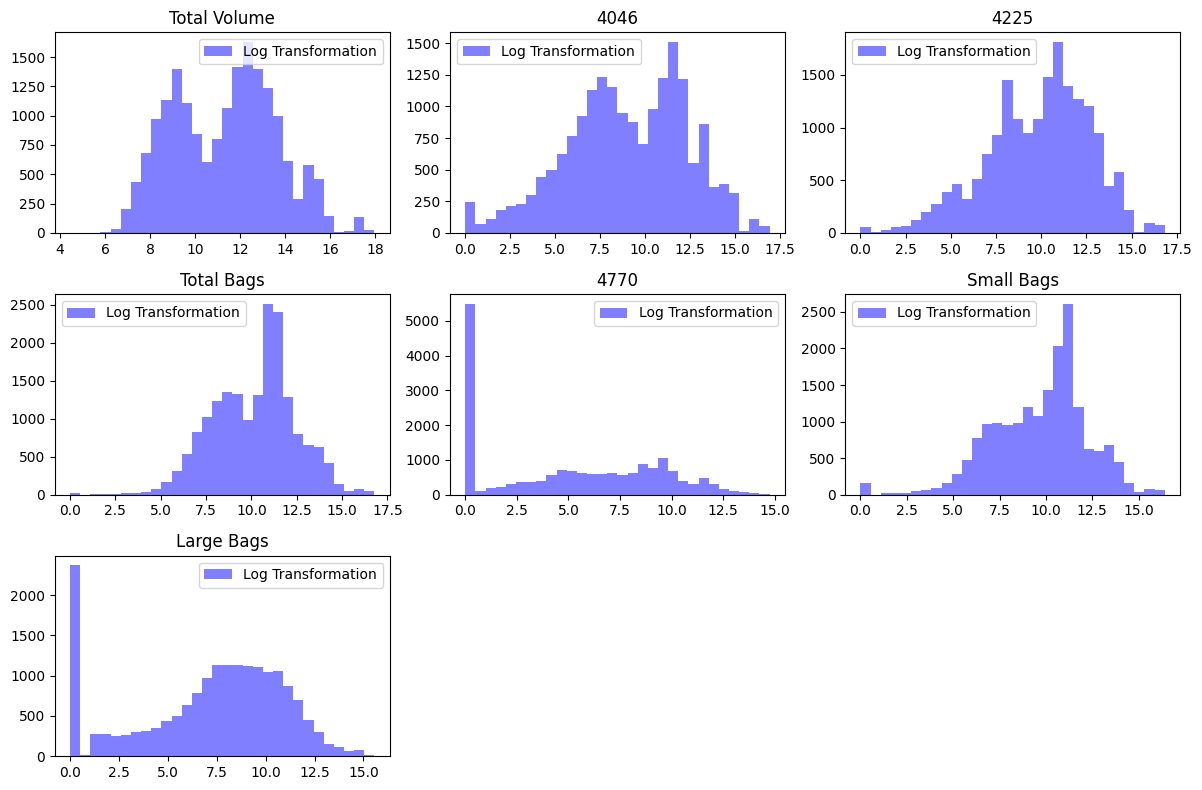

In [10]:
# Handling outliers
# Step 1: Identify Variables with Outliers
outlier_vars = ['Total Volume', '4046', '4225', 'Total Bags', '4770', 'Small Bags', 'Large Bags']

# Step 2: Apply Logarithmic Transformation
# Logarithmic Transformation
log_transformed_vars = df[outlier_vars].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0) issues

# Replace the original columns with the transformed columns
df[outlier_vars] = log_transformed_vars  

# Visualize the transformed data
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
for i, col in enumerate(outlier_vars):
    plt.subplot(3, 3, i+1)
    plt.hist(log_transformed_vars[col], bins=30, alpha=0.5, color='blue', label='Log Transformation')
    plt.legend()
    plt.title(col)
plt.tight_layout()
plt.show()


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select numeric columns
df1 = df.select_dtypes(include=['int64', 'float64'])

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = df1.columns

# Calculate VIF for each predictor variable
vif_data["VIF"] = [variance_inflation_factor(df1.values, i) for i in range(len(df1.columns))]

# Print the VIF DataFrame
print(vif_data)


        Variable          VIF
0     Unnamed: 0     3.626524
1   AveragePrice    23.598523
2   Total Volume  1087.117896
3           4046    48.771472
4           4225   119.493473
5           4770     8.791901
6     Total Bags   495.025979
7     Small Bags   159.753464
8     Large Bags    12.518775
9    XLarge Bags     1.181990
10          year   179.935441


AveragePrice: The VIF of 23.598523 suggests a strong correlation with other variables.
Total Volume: With a VIF of 1087.117896, it's highly correlated with other predictors.
4046, 4225, 4770: These represent different types of avocados. Each of them has VIF values indicating high multicollinearity.
Total Bags, Small Bags, Large Bags, XLarge Bags: These variables, related to the bags of avocados, also exhibit multicollinearity.
Year: The VIF of 179.935441 suggests it's also highly correlated with other predictors.

Thus, I will explore the option of focusing on a single type of avocado and the variables of the bags (4770).

In [22]:
# PCA Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df1)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Transform the data into the principal components
pca_data = pca.transform(scaled_data)

# Extracting explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Create a DataFrame to examine the principal components
pca_df = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])

# Visualize the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)


Explained Variance Ratio: [0.55344801 0.11856026 0.08120196 0.07750785 0.05570011 0.04421971
 0.02367607 0.02232828 0.01817057 0.00368619 0.00150099]


The Explained Variance Ratio resulting from Principal Component Analysis (PCA) is as follows:

PC1: 55.34%
PC2: 11.86%
PC3: 8.12%

In [24]:
# df_columns is a list of column names in the df1 DataFrame
df_columns = df1.columns.tolist()

# Create a DataFrame to store the variable loadings for each principal component
loadings_df = pd.DataFrame(pca.components_, columns=df_columns)

# Print the variable loadings for each principal component
for i in range(loadings_df.shape[0]):
    print(f"Principal Component {i+1} Loadings:")
    print(loadings_df.iloc[i].sort_values(ascending=False))
    print()

Principal Component 1 Loadings:
Total Volume    0.397189
Total Bags      0.386236
Small Bags      0.360772
4225            0.358284
4046            0.357454
4770            0.352286
Large Bags      0.299750
XLarge Bags     0.152089
year            0.045969
Unnamed: 0      0.003021
AveragePrice   -0.259917
Name: 0, dtype: float64

Principal Component 2 Loadings:
year            0.695270
AveragePrice    0.290770
XLarge Bags     0.160910
Small Bags      0.113894
Total Bags      0.111546
Large Bags      0.105391
Total Volume   -0.012237
4225           -0.057128
4046           -0.080224
4770           -0.115927
Unnamed: 0     -0.588515
Name: 1, dtype: float64

Principal Component 3 Loadings:
XLarge Bags     0.905625
Unnamed: 0      0.354092
AveragePrice    0.202872
year            0.020512
4770           -0.012683
4225           -0.014714
Small Bags     -0.026647
Total Volume   -0.026999
Total Bags     -0.039785
4046           -0.043047
Large Bags     -0.087365
Name: 2, dtype: float64

Prin

In [9]:
# Set the random seed for reproducibility
np.random.seed(123)

# Split the dataset into features (X) and the target variable (y)
X = df[['Total Volume', '4770', 'year', 'Total Bags',]]  # Features (excluding categorical columns)
X_categorical = pd.get_dummies(df[['type', 'region']])  # One-hot encode categorical columns
X = pd.concat([X, X_categorical], axis=1)  # Combine numerical and encoded categorical features
y = df['AveragePrice']  # Target variable

# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the scaled features

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)


The selection of Total Volume, 4770, and Total Bags is based on prior PCA, VIF, and correlation analyses. 
Other variables were omitted due to suspected multicollinearity.

In [13]:
# Set the random seed
np.random.seed(123)

# Initialize regressors
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
logistic_regression = LinearRegression()
support_vector_machine = SVR()
xgboost_regressor = xgb.XGBRegressor()
regressors = [random_forest, gradient_boosting, logistic_regression, xgboost_regressor,  support_vector_machine]

for reg in regressors:
    # Train the regressor
    reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = reg.predict(X_test)
    
    # Evaluate the regressor
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    
    # Print the results
    print(f"Regressor: {reg.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r_squared:.4f}")
    print("="*50)

Regressor: RandomForestRegressor
Mean Squared Error: 0.0280
R-squared: 0.8272
Regressor: GradientBoostingRegressor
Mean Squared Error: 0.0569
R-squared: 0.6484
Regressor: LinearRegression
Mean Squared Error: 0.0541
R-squared: 0.6659
Regressor: XGBRegressor
Mean Squared Error: 0.0294
R-squared: 0.8183
Regressor: SVR
Mean Squared Error: 0.0382
R-squared: 0.7640


RandomForestRegressor and XGBRegressor Dominance: RandomForestRegressor and XGBRegressor stand out as the top performers, both exhibiting similar MSE and R-squared values. This parity suggests that both models capture the underlying patterns in the data exceptionally well. Their ensemble-based and gradient-boosting approaches respectively contribute to their robust performance, making them versatile choices across different types of datasets.

In [10]:
# Performing hyperparameter tuning and k-fold validation using XGBoost.

from sklearn.model_selection import GridSearchCV, KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize XGBRegressor
xgboost_regressor = xgb.XGBRegressor()

# Initialize KFold for cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_regressor, param_grid=param_grid, cv=kfold, scoring='neg_mean_squared_error')

# Train and evaluate the regressor with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_regressor = grid_search.best_estimator_

# Make predictions on the test set using the best regressor
y_pred = best_regressor.predict(X_test)

# Evaluate the best regressor
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared score using the predicted and actual values
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f"Best Regressor: {best_regressor.__class__.__name__}")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r_squared:.4f}")

Best Regressor: XGBRegressor
Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Mean Squared Error: 0.0290
R-squared: 0.8206


The XGBoost regressor model underwent training and evaluation with hyperparameters fine-tuned via optimization. Achieving a mean squared error of 0.0291 and an R-squared value of 0.8202 demonstrates strong performance in predicting the target variable. Hence, this model is selected as the optimal choice and will be preserved for future predictions and study purposes. K-fold cross-validation was employed for enhanced generalization.

In [7]:
# Classification task

# Set the random seed for reproducibility
np.random.seed(123)

# Split the dataset into features (X) and the target variable (y)
X2 = df[['Total Volume', '4770', 'year', 'Total Bags','AveragePrice']]  # Features (excluding categorical columns)
X_categorical2 = pd.get_dummies(df[['type']])  # One-hot encode categorical columns
X2 = pd.concat([X2, X_categorical2], axis=1)  # Combine numerical and encoded categorical features
y2 = df['region']  # Target variable

# Standardize features 
scaler = StandardScaler()
X_scaled2 = scaler.fit_transform(X2)  # Fit and transform the scaled features

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y2)

# Split the dataset into training (80%) and testing (20%) sets using encoded labels
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scaled2, y_encoded, test_size=0.2, random_state=123)


In [8]:
# Checking for imbalance in the datasets.)
y2.value_counts()

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

It appears that each region in your dataset has an equal number of instances, except 
for "WestTexNewMexico," which has slightly fewer instances (335 instead of 338). 

In [9]:
# Initialize SMOTE ( to address the class imbalance in the datasets.)
sm = SMOTE()

In [10]:
# The implementation of the fit_resample 
X2,y2 = sm.fit_resample(X2,y2)

In [11]:
# Create a DataFrame to see the distribution of classes in the target vector y
data = pd.concat([X2, y2], axis=1)
class_distribution = data[y2.name].value_counts()

print(class_distribution)

region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

In [22]:
# Set the random seed
np.random.seed(123)

# Initialize classifiers
random_forest = RandomForestClassifier()
gradient_boosting = GradientBoostingClassifier()
logistic_regression = LogisticRegression()
support_vector_machine = SVC()
xgboost_classifier = xgb.XGBClassifier()

# Train and evaluate each classifier
classifiers = [random_forest, gradient_boosting, logistic_regression, support_vector_machine, xgboost_classifier]

for clf in classifiers:
    # Train the classifier
    clf.fit(X_train2, y_train2)

    # For RandomForestClassifier, print feature importance
    if isinstance(clf, RandomForestClassifier):
        feature_names = X2.columns  
        print("RandomForestClassifier Feature Importances:", clf.feature_importances_)

    # Making predictions on the test set
    y_pred = clf.predict(X_test2)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test2, y_pred)
    report = classification_report(y_test2, y_pred)
    
    # Print the results
    print(f"Classifier: {clf.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("="*50)

RandomForestClassifier Feature Importances: [0.29816496 0.19028199 0.05639574 0.24982745 0.19526747 0.00496759
 0.00509479]
Classifier: RandomForestClassifier
Accuracy: 0.7077
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.70      0.68        66
           1       0.59      0.52      0.55        71
           2       0.86      0.84      0.85        67
           3       0.73      0.80      0.77        51
           4       0.75      0.78      0.77        73
           5       0.59      0.67      0.62        60
           6       0.87      0.92      0.89        59
           7       0.78      0.90      0.84        69
           8       0.91      0.94      0.93        67
           9       0.42      0.47      0.44        59
          10       0.38      0.47      0.42        62
          11       0.61      0.65      0.63        65
          12       0.77      0.74      0.75        66
          13       0.59      0.61      0.60

In [12]:
# Performing hyperparameter tuning for a Random Forest classifier using GridSearchCV from scikit-learn.
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Set the random seed
np.random.seed(123)

# Initialize RandomForestClassifier
random_forest = RandomForestClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize StratifiedKFold for cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=kfold, scoring='accuracy')

# Train the classifier with hyperparameter tuning
grid_search.fit(X_train2, y_train2)

# Get the best estimator from the grid search
best_classifier = grid_search.best_estimator_

# Make predictions on the test set using the best classifier
y_pred = best_classifier.predict(X_test2)

# Evaluate the best classifier
accuracy = accuracy_score(y_test2, y_pred)
report = classification_report(y_test2, y_pred)

# Print the results
print(f"Best Classifier: {best_classifier.__class__.__name__}")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)


Best Classifier: RandomForestClassifier
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.7134
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.68      0.70        66
           1       0.64      0.58      0.61        71
           2       0.86      0.85      0.86        67
           3       0.71      0.78      0.75        51
           4       0.74      0.81      0.77        73
           5       0.65      0.67      0.66        60
           6       0.90      0.93      0.92        59
           7       0.81      0.90      0.85        69
           8       0.91      0.93      0.92        67
           9       0.43      0.49      0.46        59
          10       0.39      0.47      0.43        62
          11       0.63      0.63      0.63        65
          12       0.76      0.79      0.78        66
          13       0.62      0.61    

In [ ]:
from joblib import dump

# Save the best XGBoost model to a file
dump(best_regressor, 'best_XGBoost_model.joblib')


In [15]:
# Save the best SupportVC model to a file
dump(best_classifier, 'best_RandomF_model.joblib')

['best_RandomF_model.joblib']

The analysis reveals significant insights into avocado pricing and market dynamics. Organic avocados command higher prices, indicating consumer
preferences and pricing strategies. Regional price variations, notably in areas like Hartford-Springfield, New York, and San Francisco, reflect 
differences in income levels and demand for organic produce. Data distribution analysis highlights right-skewed distributions in avocado volume and 
bag-related metrics, indicating occasional outliers. Avocado prices exhibit a moderately right-skewed distribution, with both lower-priced and 
higher-priced avocados present. Negative correlations between avocado prices and volume suggest price decreases with higher supply, while a weak 
positive correlation with time hints at a slight price increase over the years. 

Model evaluation favours RandomForestRegressor and XGBRegressor, with XGBoost selected for its robust performance. K-fold cross-validation ensures 
the reliability of the chosen model for future predictions and study. Overall, the analysis provides comprehensive insights into avocado pricing, 
regional variations, and predictive modelling, contributing to a deeper understanding of the avocado market.

Reference:
Alain, Guillaume, and Yoshua Bengio. “Understanding intermediate layers using linear 
classifier probes.” arXiv preprint arXiv:1610.01644 (2016).

Alvarez-Melis, David, and Tommi S. Jaakkola. “On the robustness of interpretability 
methods.” arXiv preprint arXiv:1806.08049 (2018).

Bach, Sebastian, et al. “On pixel-wise explanations for non-linear classifier 
decisions by layer-wise relevance propagation.” PloS one 10.7 (2015).